In [1]:
%matplotlib widget

import os  
import sys  
sys.path.insert(0, os.getenv('HOME')+'/pycode/MscThesis/')
from pymatreader import read_mat
from scipy import sparse
import numpy as np
import os
from datetime import datetime, timedelta
import pandas
import cv2
import json
import pandas as pd
from amftrack.pipeline.paths.directory import *
from amftrack.util import *
import pickle
from joblib import Parallel, delayed
from datetime import datetime
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.post_processing.global_plate import *
from amftrack.pipeline.functions.post_processing.global_hypha import *
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.post_processing.time_plate import *

/home/cbisot/pycode/MscThesis/amftrack/transfer/functions/transfer.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# directory = '/projects/0/einf914/agg/'

directory = directory_project
# update_analysis_info(directory)
analysis_info = get_analysis_info(directory)

In [3]:
select = analysis_info.loc[analysis_info['Plate']!=22]

In [4]:
select = analysis_info.loc[analysis_info['Plate'].isin([94])]

In [4]:
analysis_info['Plate']=analysis_info['Plate'].fillna(758)

In [8]:
frames = []
for index, row in select.iterrows():
    ser = pd.read_json(f'{directory}{row["path_global_plate_info"]}',convert_dates=True,typ='series')
    frame = ser.to_frame(index).transpose()
    frames.append(frame)
global_plate_infos = pd.concat(frames)
global_plate_infos

ValueError: Expected object or value

In [7]:
global_plate_infos

NameError: name 'global_plate_infos' is not defined

In [7]:
global_plate_infos.to_pickle('global_plate_infos.pick')

In [4]:
frames = []
for index, row in select.iterrows():
    if os.path.isfile(f'{directory}{row["path_time_plate_info"]}'):
        frame = pd.read_json(f'{directory}{row["path_time_plate_info"]}',convert_dates=True).transpose()
        frame.index.name = 't'
        frame.reset_index(inplace=True)
        frame['datetime'] = pd.to_datetime(frame['date'], format="%d.%m.%Y, %H:%M:")
        frame['time_since_begin'] = (frame['datetime'] - min(frame['datetime']))/ np.timedelta64(1, 'h')
        frames.append(frame)
time_plate_infos = pd.concat(frames,ignore_index=True)


In [5]:
time_plate_infos

,t,tot_length,date,Plate,path_exp,folder_analysis,num_trunks,area,area_sep_comp,num_tips,...,ring_density_incr-100_index-12,ring_density_incr-100_index-13,ring_density_incr-100_index-14,ring_density_incr-100_index-15,ring_density_incr-100_index-16,ring_density_incr-100_index-17,ring_density_incr-100_index-18,ring_density_incr-100_index-19,datetime,time_since_begin
0,0,22449.9,"01.10.2021, 16:20:",799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,4,24.1887,9.20624,12,...,None,None,None,None,None,None,None,None,2021-10-01 16:20:00,0.000000
1,1,33452.4,"01.10.2021, 18:20:",799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,4,47.5955,10.6931,22,...,None,None,None,None,None,None,None,None,2021-10-01 18:20:00,2.000000
2,2,35650.7,"01.10.2021, 20:20:",799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,4,51.479,11.9078,24,...,None,None,None,None,None,None,None,None,2021-10-01 20:20:00,4.000000
3,3,36927.2,"01.10.2021, 22:20:",799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,4,54.8565,13.1558,24,...,None,None,None,None,None,None,None,None,2021-10-01 22:20:00,6.000000
4,4,37782.6,"02.10.2021, 00:20:",799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,4,57.5027,14.1281,24,...,None,None,None,None,None,None,None,None,2021-10-02 00:20:00,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,18,3.502e+06,"25.09.2021, 07:23:",787,Analysis_1636046513186951533_0_23_Version9/exp...,Analysis_1636046513186951533_0_23_Version9,13,2810.39,2265.27,2039,...,None,None,None,None,None,None,None,None,2021-09-25 07:23:00,35.983333
1119,19,3.48177e+06,"25.09.2021, 09:23:",787,Analysis_1636046513186951533_0_23_Version9/exp...,Analysis_1636046513186951533_0_23_Version9,13,2802.64,2274.97,2024,...,None,None,None,None,None,None,None,None,2021-09-25 09:23:00,37.983333
1120,20,3.53471e+06,"25.09.2021, 11:23:",787,Analysis_1636046513186951533_0_23_Version9/exp...,Analysis_1636046513186951533_0_23_Version9,13,2802.47,2269.96,2036,...,None,None,None,None,None,None,None,None,2021-09-25 11:23:00,39.983333
1121,21,3.57641e+06,"25.09.2021, 13:23:",787,Analysis_1636046513186951533_0_23_Version9/exp...,Analysis_1636046513186951533_0_23_Version9,13,2803.1,2243.66,2095,...,None,None,None,None,None,None,None,None,2021-09-25 13:23:00,41.983333


In [6]:
time_plate_infos.to_pickle('time_plate_infos.pick')

In [20]:
time_plate_infos['Plate_label'] = time_plate_infos['Plate'].astype(str)
time_plate_infos['log_tot_length_study'] = np.log((time_plate_infos['tot_length_study']+1.0).astype(float))


In [15]:
time_plate_infos

,t,tot_length,area,area_sep_comp,num_tips,num_nodes,area_study,num_tips_study,num_nodes_study,tot_length_study,out_study,date,Plate,path_exp,folder_analysis,datetime,time_since_begin,Plate_label
0,0,22449.9,24.1887,9.20624,12,40,9.20624,7,15,6244.46,0,"01.10.2021, 16:20:",799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,2021-10-01 16:20:00,0.000000,799
1,1,33452.4,47.5955,10.6931,22,57,21.3145,13,28,11200,0,"01.10.2021, 18:20:",799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,2021-10-01 18:20:00,2.000000,799
2,2,35650.7,51.479,11.9078,24,62,24.2453,15,33,12909.8,0,"01.10.2021, 20:20:",799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,2021-10-01 20:20:00,4.000000,799
3,3,36927.2,54.8565,13.1558,24,65,27.1978,15,31,14121,0,"01.10.2021, 22:20:",799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,2021-10-01 22:20:00,6.000000,799
4,4,37782.6,57.5027,14.1281,24,65,29.7703,15,31,14996,0,"02.10.2021, 00:20:",799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,2021-10-02 00:20:00,8.000000,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,18,3.502e+06,2810.39,2265.27,2039,12549,2278.66,1704,10788,2.91576e+06,0,"25.09.2021, 07:23:",787,Analysis_1636046513186951533_0_23_Version9/exp...,Analysis_1636046513186951533_0_23_Version9,2021-09-25 07:23:00,35.983333,787
1120,19,3.48177e+06,2802.64,2274.97,2024,12057,2275.34,1675,10230,2.88561e+06,0,"25.09.2021, 09:23:",787,Analysis_1636046513186951533_0_23_Version9/exp...,Analysis_1636046513186951533_0_23_Version9,2021-09-25 09:23:00,37.983333,787
1121,20,3.53471e+06,2802.47,2269.96,2036,12501,2276.74,1710,10720,2.94735e+06,0,"25.09.2021, 11:23:",787,Analysis_1636046513186951533_0_23_Version9/exp...,Analysis_1636046513186951533_0_23_Version9,2021-09-25 11:23:00,39.983333,787
1122,21,3.57641e+06,2803.1,2243.66,2095,12597,2274.67,1744,10742,2.98205e+06,0,"25.09.2021, 13:23:",787,Analysis_1636046513186951533_0_23_Version9/exp...,Analysis_1636046513186951533_0_23_Version9,2021-09-25 13:23:00,41.983333,787


In [39]:
select_data = time_plate_infos.loc[(time_plate_infos['out_study']==0)&(time_plate_infos['Plate'].isin([102,94,10,76,792]))]

In [35]:
select_data

,t,tot_length,area,area_sep_comp,num_tips,num_nodes,area_study,num_tips_study,num_nodes_study,tot_length_study,out_study,date,Plate,path_exp,folder_analysis,datetime,time_since_begin,Plate_label,log_tot_length_study
329,0,110333,126.435,100.399,67,303,122.037,65,298,107980,0,"07.01.2021, 11:40:",10,Analysis_1636043977602188694_0_100_Version9/ex...,Analysis_1636043977602188694_0_100_Version9,2021-01-07 11:40:00,0.000000,10,11.589711
330,1,117502,133.855,125.1,67,334,128.62,66,325,110793,0,"07.01.2021, 15:40:",10,Analysis_1636043977602188694_0_100_Version9/ex...,Analysis_1636043977602188694_0_100_Version9,2021-01-07 15:40:00,4.000000,10,11.615426
331,2,124946,138.912,131.256,74,358,135.506,73,352,118263,0,"07.01.2021, 19:39:",10,Analysis_1636043977602188694_0_100_Version9/ex...,Analysis_1636043977602188694_0_100_Version9,2021-01-07 19:39:00,7.983333,10,11.680675
332,3,129247,143.011,135.342,79,378,136.453,78,371,122506,0,"07.01.2021, 23:39:",10,Analysis_1636043977602188694_0_100_Version9/ex...,Analysis_1636043977602188694_0_100_Version9,2021-01-07 23:39:00,11.983333,10,11.715923
333,4,132310,145.674,138.556,75,404,141.718,74,393,125616,0,"08.01.2021, 03:40:",10,Analysis_1636043977602188694_0_100_Version9/ex...,Analysis_1636043977602188694_0_100_Version9,2021-01-08 03:40:00,16.000000,10,11.740990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,76,1.50792e+06,1334.84,1280.13,933,4894,1280.47,895,4789,1.43529e+06,0,"26.11.2020, 17:09:",94,Analysis_1636046622780809853_0_100_Version9/ex...,Analysis_1636046622780809853_0_100_Version9,2020-11-26 17:09:00,76.266667,94,14.176881
522,77,1.53745e+06,1355.85,1300.81,951,4944,1307.28,913,4835,1.46734e+06,0,"26.11.2020, 18:09:",94,Analysis_1636046622780809853_0_100_Version9/ex...,Analysis_1636046622780809853_0_100_Version9,2020-11-26 18:09:00,77.266667,94,14.198964
523,78,1.57391e+06,1569.52,1322.23,965,5128,1514.45,927,5019,1.5053e+06,0,"26.11.2020, 19:09:",94,Analysis_1636046622780809853_0_100_Version9/ex...,Analysis_1636046622780809853_0_100_Version9,2020-11-26 19:09:00,78.266667,94,14.224505
524,79,1.60777e+06,1588.58,1346.82,1001,5217,1534.67,961,5107,1.53516e+06,0,"26.11.2020, 20:09:",94,Analysis_1636046622780809853_0_100_Version9/ex...,Analysis_1636046622780809853_0_100_Version9,2020-11-26 20:09:00,79.266667,94,14.244144


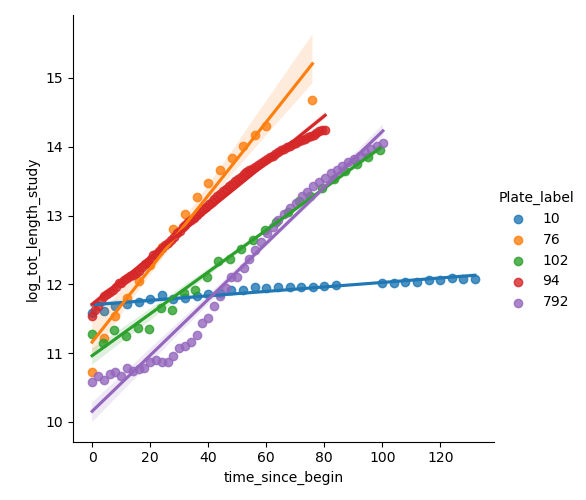

In [40]:
plt.close('all')
sns.lmplot(x="time_since_begin", y="log_tot_length_study", hue="Plate_label", data=select_data);

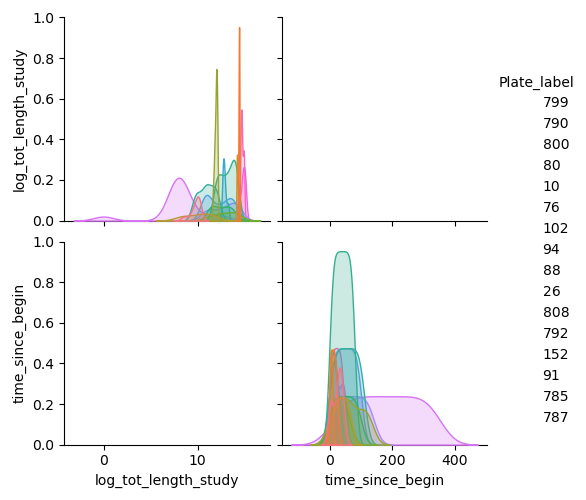

In [22]:
import seaborn as sns
sns.pairplot(select_data,vars = ['log_tot_length_study','time_since_begin'],kind = "regression", hue = 'Plate_label')